# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [3]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | This is to express our disp...
1,✅ Trip Verified | I flew London to Malaga on ...
2,✅ Trip Verified | I arrived at the airport ab...
3,"✅ Trip Verified | Filthy plane, cabin staff o..."
4,✅ Trip Verified | Chaos at Terminal 5 with B...


In [4]:
df.to_csv("BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [8]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Pramod\AppData\Roaming\nltk_data...


True

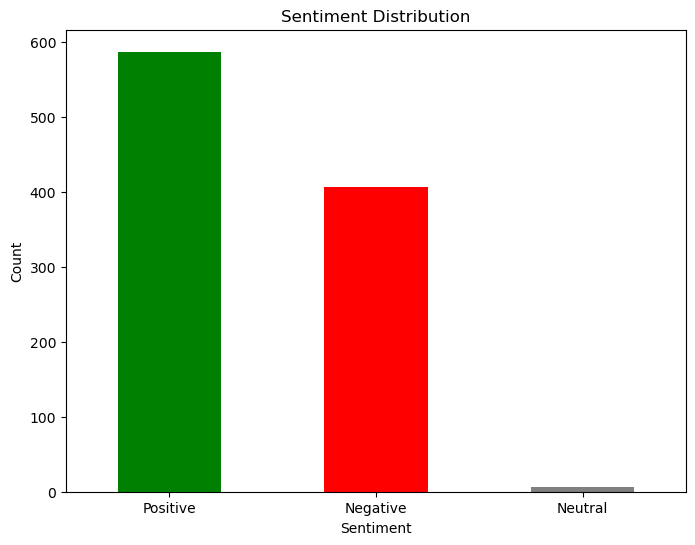

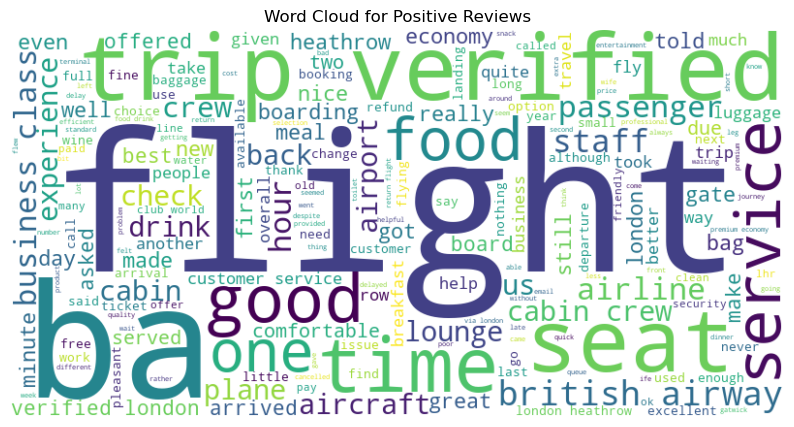

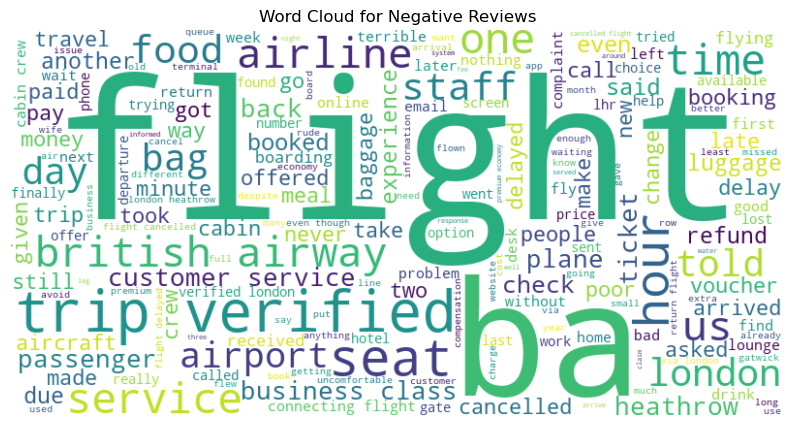

KeyError: 'problems_or_benefits'

In [30]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.sentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Load reviews from the CSV file
reviews_df = pd.read_csv('BA_reviews.csv')

# Data cleaning and preprocessing
def clean_text(text):
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(text.lower())
    cleaned_tokens = [word for word in tokens if word.isalnum() and word not in stop_words]
    return ' '.join(cleaned_tokens)

reviews_df['cleaned_review'] = reviews_df['reviews'].apply(clean_text)

# Sentiment analysis
sia = SentimentIntensityAnalyzer()
reviews_df['sentiment_score'] = reviews_df['cleaned_review'].apply(lambda x: sia.polarity_scores(x)['compound'])
reviews_df['sentiment'] = reviews_df['sentiment_score'].apply(lambda score: 'Positive' if score > 0 else 'Negative' if score < 0 else 'Neutral')

# Sentiment distribution bar chart
sentiment_distribution = reviews_df['sentiment'].value_counts()
plt.figure(figsize=(8, 6))
sentiment_distribution.plot(kind='bar', color=['green', 'red', 'gray'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# Word cloud for positive reviews
positive_reviews = ' '.join(reviews_df[reviews_df['sentiment'] == 'Positive']['cleaned_review'])
positive_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)
plt.figure(figsize=(10, 6))
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Positive Reviews')
plt.axis('off')
plt.show()

# Word cloud for negative reviews
negative_reviews = ' '.join(reviews_df[reviews_df['sentiment'] == 'Negative']['cleaned_review'])
negative_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(negative_reviews)
plt.figure(figsize=(10, 6))
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Negative Reviews')
plt.axis('off')
plt.show()

# Most repeated problems and good reviews bar chart
top_problems = reviews_df['problems_or_benefits'][reviews_df['sentiment'] == 'Negative'].value_counts().head(5)
top_good_reviews = reviews_df['problems_or_benefits'][reviews_df['sentiment'] == 'Positive'].value_counts().head(5)
plt.figure(figsize=(10, 6))
top_problems.plot(kind='bar', color='red', alpha=0.7, label='Problems')
top_good_reviews.plot(kind='bar', color='green', alpha=0.7, label='Good Reviews')
plt.title('Most Repeated Problems and Good Reviews')
plt.xlabel('Problems or Good Reviews')
plt.ylabel('Count')
plt.xticks(rotation=15)
plt.legend()
plt.show()
